In [141]:
import matplotlib.pyplot as plt
from minisom import MiniSom
import numpy as np

In [142]:
def get_data(batch_size):
    data = np.empty(shape=[0, 2])
    targets = np.zeros(batch_size)
    for batch_i in range(batch_size):
        x_point = [round(np.random.uniform(-1.0, 3.0), 1), round(np.random.uniform(-10., 10.), 1)]
        data = np.append(data, [x_point], axis=0)
        if x_point[0] >= 2:
            targets[batch_i] = 0
        elif x_point[0] >= 1 and x_point[0] < 2:
            targets[batch_i] = 1
        elif x_point[0] >= 0 and x_point[0] < 1:
            targets[batch_i] = 2
        elif x_point[0] < 0:
            targets[batch_i] = 3
    targets = targets.astype(int)
    return data, targets

In [143]:
train_data, train_targets = get_data(5000)

In [144]:
zero, one, two, three = train_targets.tolist().count(0), train_targets.tolist().count(1), train_targets.tolist().count(2), train_targets.tolist().count(3)
print(f'zero:{zero}\none:{one}\ntwo:{two}\nthree:{three}')

zero:1302
one:1263
two:1236
three:1199


In [145]:
def classify(som, data):
    winmap = som.labels_map(train_data, train_targets)
    default_class = np.sum(list(winmap.values())).most_common()[0][0]
    result = []
    for d in data:
        win_position = som.winner(d)
        if win_position in winmap:
            result.append(winmap[win_position].most_common()[0][0])
        else:
            result.append(default_class)
    return result

In [147]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

test_data, test_targets = get_data(400)

som = MiniSom(21, 21, 2, sigma=4, learning_rate=0.2,
             neighborhood_function='gaussian', random_seed=15)
som.pca_weights_init(train_data)
som.train_random(train_data, 800, verbose=True)

print(classification_report(test_targets, classify(som, test_data)))

 [ 800 / 800 ] 100% - 0:00:00 left 
 quantization error: 0.32105807997407365
              precision    recall  f1-score   support

           0       0.94      0.95      0.95       109
           1       0.92      0.85      0.89       109
           2       0.85      0.93      0.89        95
           3       0.95      0.93      0.94        87

    accuracy                           0.92       400
   macro avg       0.92      0.92      0.92       400
weighted avg       0.92      0.92      0.91       400



In [148]:
def point_classification(test_data, preds):
    first_class_x_points = []
    first_class_y_points = []

    second_class_x_points = []
    second_class_y_points = []

    third_class_x_points = []
    third_class_y_points = []

    fourth_class_x_points = []
    fourth_class_y_points = []

    for i in range(len(test_data)):
        if preds[i] == 0:
            first_class_x_points.append(test_data[i][0])
            first_class_y_points.append(test_data[i][1])
        elif preds[i] == 1:
            second_class_x_points.append(test_data[i][0])
            second_class_y_points.append(test_data[i][1])
        elif preds[i] == 2:
            third_class_x_points.append(test_data[i][0])
            third_class_y_points.append(test_data[i][1])
        elif preds[i] == 3:
            fourth_class_x_points.append(test_data[i][0])
            fourth_class_y_points.append(test_data[i][1])
    return first_class_x_points, first_class_y_points, second_class_x_points, second_class_y_points, third_class_x_points, third_class_y_points, fourth_class_x_points, fourth_class_y_points

In [149]:
preds = classify(som, test_data)
preds = np.array(preds)
fi_class_x, fi_class_y, s_class_x, s_class_y, t_class_x, t_class_y, fo_class_x, fo_class_y = point_classification(test_data, preds)

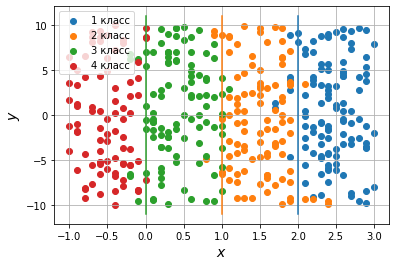

In [150]:
plt.figure(1)
plt.grid()
plt.xlabel("$x$", fontsize=14)
plt.ylabel("$y$", fontsize=14)

plt.plot([2, 2], [-11, 11])
plt.plot([1, 1], [-11, 11])
plt.plot([0, 0], [-11, 11])

plt.scatter(fi_class_x, fi_class_y, label="1 класс")
plt.scatter(s_class_x, s_class_y, label="2 класс")
plt.scatter(t_class_x, t_class_y, label="3 класс")
plt.scatter(fo_class_x, fo_class_y, label="4 класс")
plt.legend()
plt.show()